In [ ]:
using IFSintegrals, Plots, LinearAlgebra

┌ Info: Precompiling IFSintegrals [2e7d41c8-7523-11ec-3fc2-377bcf57d765]
└ @ Base loading.jl:1423
  ** incremental compilation may be fatally broken for this module **



Define a couple of fractals from presets:

In [2]:
γ = CantorSet(weights = [0.7, 0.3])
Δ = Sierpinski(weights = [0.2, 0.3, 0.5]);


In [3]:
Δ.Hausdorff_dimension

1.5849625007211563

### Gauss quadrature
Gauss quadrature, [as in Mantica '96](https://link.springer.com/article/10.1007/BF02437506), is only possible on fractals where $\Gamma\subset\mathbb{R}$. So we can do this on the Cantor set $\gamma$, an $N$-point rule can be constructed like so:

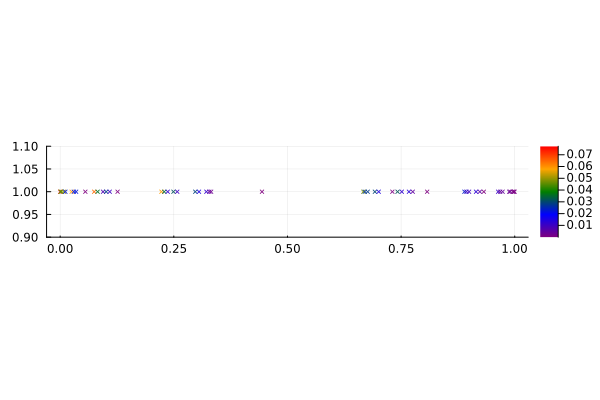

In [4]:
N = 51
x,w = gauss_quad(γ,N);
scatter(x,ones(length(x)),shape=:x,markersize=2,mc=:rainbow,mz=w,ylims=(1-0.1,1.1),aspect_ratio = 1,label=false)

Notice how not all of the quadrture points lie inside of the fractal $\gamma$, there is clearly some influence from $\gamma$. So, to approximate
$$
\int_\gamma \sin(x)\mathcal{H}^d(x)
$$
we can write

In [5]:
w'*sin.(x)

0.2762410884684753

### Barycentre rule
To use the barycentre rule, [as in Gibbs et. al. '22](https://discovery.ucl.ac.uk/id/eprint/10155585/2/Hewett_Numerical%20Quadrature%20for%20Singular%20Integrals%20on%20Fractals_AOP.pdf), with meshwidth parameter $h>0$, type:

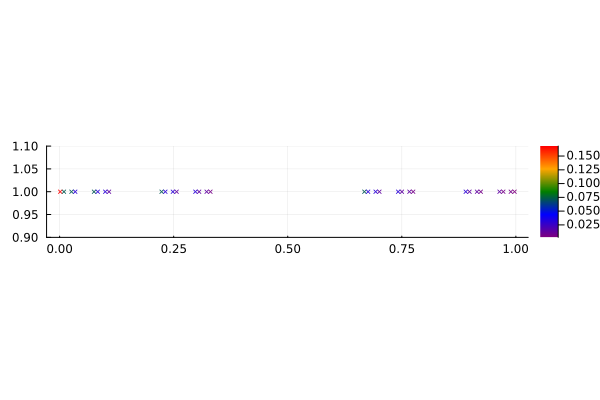

In [6]:
h = 0.01
x,w = barycentre_rule(γ,h)
scatter(x,ones(length(x)),shape=:x,markersize=2,mc=:rainbow,mz=w,ylims=(1-0.1,1.1),aspect_ratio = 1,label=false)

In [7]:
w'*sin.(x)

0.2762413343447725

The barycentre rule will converge slower than Gauss, but has the advantage that it can be applied to fractals in any dimension. For example:

In [8]:
x,w = barycentre_rule(Δ,h);

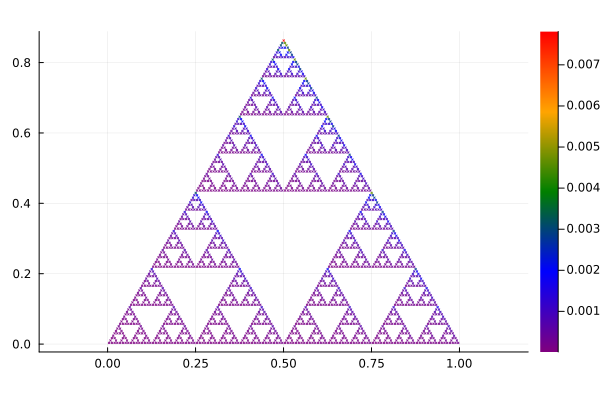

In [9]:
scatter([x_[1] for x_∈x],[x_[2] for x_∈x],shape=:x,markersize=1,mc=:rainbow,mz=w,aspect_ratio = 1,label=false)

In [10]:
W = rand(7)
W = W./sum(W)
K = KochFlake(weights = W);
h = 0.05;
x,w = barycentre_rule(K,h);
scatter([x_[1] for x_∈x],[x_[2] for x_∈x],shape=:x,markersize=2,mc=:rainbow,mz=log10.(w),aspect_ratio = 1,label=false)

To approximate
$$
\int_\Delta \sin(|x|) \mathcal{H}^d(x)
$$
we can type

In [11]:
w'*sin.(norm.(x))

0.5542478046638346

### Chaos game quadrature

Chaos game quadrature, [as in Forte et. al '98](https://epubs.siam.org/doi/abs/10.1137/S0036141096306911?casa_token=ywEgBBMsrLIAAAAA:cQqjSxmAHG9Qh-brcK9TYvZvi-moOQTd08WdXhw5HIUqN0GjXPKePURtZywnf4gm2FayzVgZ4w), rules can be produced using:

In [12]:
N = 5000 # 10000 is a bit too many
x,w = chaos_quad(Δ,N);

In [13]:
# scatter([x_[1] for x_∈x],[x_[2] for x_∈x],shape=:+,markersize=2,mc=:rainbow,mz=w)
scatter([x_[1] for x_∈x],[x_[2] for x_∈x],shape=:x,markersize=1,mc=:rainbow,mz=w,aspect_ratio = 1,label=false)

### Computing $s$-energy
The $s$-energy takes three arguments.
* The first is the fractal
* The second is the $s$-value. A value $s=0$ corresponds to logarithmic potential (see below), otherwise
$$
\int_\Gamma\int_\Gamma|x-y|^{-s}\mathcal{H}^d(x)\mathcal{H}^d(y)
$$
is computed.
* The third corresponds to quadrature. If a non-negative number $h>0$ is provided, it defaults to the Barycentre rule.

To approximate
$$
\int_\gamma\int_\gamma \log|x-y|~\mathcal{H}^d(y)\mathcal{H}^d(x),
$$
we can type

In [14]:
h=0.01
s_energy(γ,0,h)

-1.9507775162465844

for a barycentre approximation. Alternatively, for example, we can specify our own $10$-point Gauss rule, and use that:

In [15]:
function gauss_for_s_energy(X,Y,f)
   x,y,w = gauss_quad(X,Y,10)
    return w'*f.(x,y)
end
s_energy(γ,0,gauss_for_s_energy)

-1.9507823248038123

To approximate
$$
\int_\Delta\int_\Delta|x-y|^{-1}~\mathcal{H}^d(y)\mathcal{H}^d(x),
$$
we can type

In [16]:
s_energy(Δ,1.0,h)

5.675567320218839